In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
import datetime as dt
import pickle


from pvlib import solarposition, irradiance, temperature, iam, pvsystem, atmosphere, tracking
from pvlib.iotools import get_pvgis_tmy

In [2]:
df_weather = pd.read_csv('weather_data.csv')
df_weather['Timestamp'] = pd.to_datetime(df_weather['Timestamp'])
display(df_weather.head())
display(df_weather.tail())

,Timestamp,GHI,DHI,DNI,TAMB,WDSP,plantId,deviceId
0,2020-01-01 00:00:00+00:00,0.0,0.0,0.0,25.531250,1.750977,UD73AyeXNWu49Xh1NzTa,virtual-weather-station
1,2020-01-01 01:00:00+00:00,0.0,0.0,0.0,25.078125,2.089844,UD73AyeXNWu49Xh1NzTa,virtual-weather-station
2,2020-01-01 02:00:00+00:00,0.0,0.0,0.0,24.531250,2.503906,UD73AyeXNWu49Xh1NzTa,virtual-weather-station
3,2020-01-01 03:00:00+00:00,0.0,0.0,0.0,24.125000,2.703125,UD73AyeXNWu49Xh1NzTa,virtual-weather-station
4,2020-01-01 04:00:00+00:00,0.0,0.0,0.0,23.765625,2.666016,UD73AyeXNWu49Xh1NzTa,virtual-weather-station


,Timestamp,GHI,DHI,DNI,TAMB,WDSP,plantId,deviceId
35083,2021-12-31 19:00:00+00:00,103.6840,103.6840,0.0000,22.734375,1.892578,3Xn5nwPrHuQaylpeqYLY,virtual-weather-station
35084,2021-12-31 20:00:00+00:00,95.9436,95.9436,0.0000,22.593750,1.516602,3Xn5nwPrHuQaylpeqYLY,virtual-weather-station
35085,2021-12-31 21:00:00+00:00,29.5076,29.4489,0.4337,21.843750,0.927246,3Xn5nwPrHuQaylpeqYLY,virtual-weather-station
35086,2021-12-31 22:00:00+00:00,0.0000,0.0000,0.0000,21.421875,1.119141,3Xn5nwPrHuQaylpeqYLY,virtual-weather-station
35087,2021-12-31 23:00:00+00:00,0.0000,0.0000,0.0000,20.703125,1.447266,3Xn5nwPrHuQaylpeqYLY,virtual-weather-station


In [3]:
df_plant_0 = df_weather['plantId'].value_counts().index[0]
df_plant_0 = df_weather[df_weather['plantId']==df_plant_0]

df_plant_1 = df_weather['plantId'].value_counts().index[1]
df_plant_1 = df_weather[df_weather['plantId']==df_plant_1]

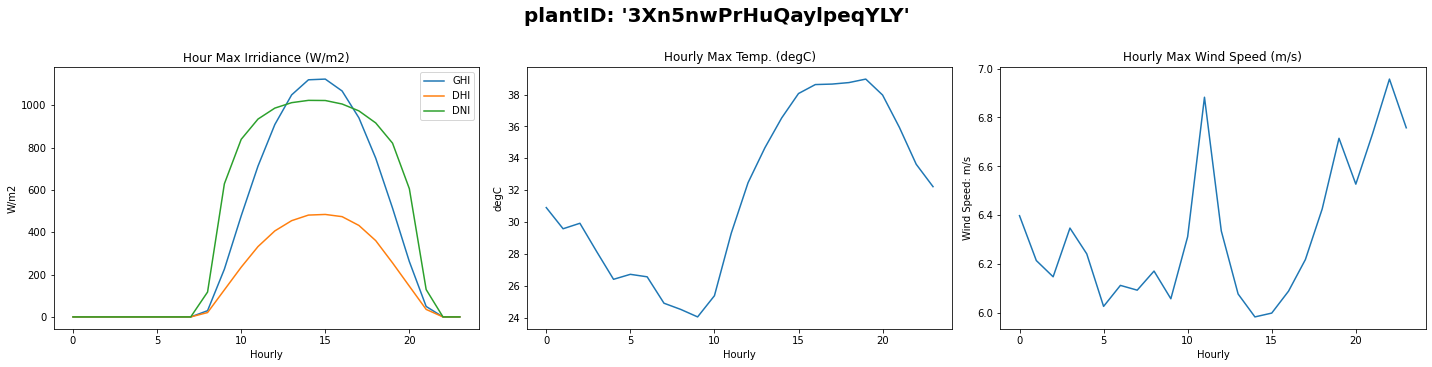

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
fig.tight_layout()

df_plant_0.groupby(df_plant_0['Timestamp'].dt.hour)['GHI'].max().plot(ax=ax[0])
df_plant_0.groupby(df_plant_0['Timestamp'].dt.hour)['DHI'].max().plot(ax=ax[0])
df_plant_0.groupby(df_plant_0['Timestamp'].dt.hour)['DNI'].max().plot(ax=ax[0])
ax[0].set_xlabel('Hourly')
ax[0].set_ylabel ('W/m2')
ax[0].set_title('Hour Max Irridiance (W/m2)')
ax[0].legend(['GHI', 'DHI', 'DNI'])

df_plant_0.groupby(df_plant_0['Timestamp'].dt.hour)['TAMB'].max().plot(ax=ax[1])
ax[1].set_xlabel('Hourly')
ax[1].set_ylabel ('degC')
ax[1].set_title('Hourly Max Temp. (degC)')

df_plant_0.groupby(df_plant_0['Timestamp'].dt.hour)['WDSP'].max().plot(ax=ax[2])
ax[2].set_xlabel('Hourly')
ax[2].set_ylabel ('Wind Speed: m/s')
ax[2].set_title('Hourly Max Wind Speed (m/s)')

fig.suptitle("plantID: '3Xn5nwPrHuQaylpeqYLY'",fontsize=20, fontweight = "bold", y=1.01)
fig.tight_layout();

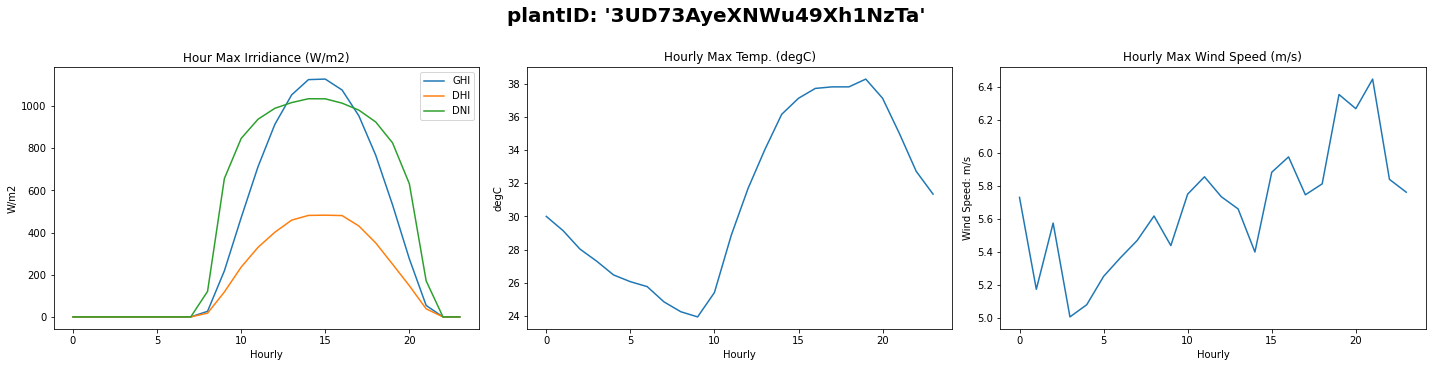

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
fig.tight_layout()

df_plant_1.groupby(df_plant_1['Timestamp'].dt.hour)['GHI'].max().plot(ax=ax[0])
df_plant_1.groupby(df_plant_1['Timestamp'].dt.hour)['DHI'].max().plot(ax=ax[0])
df_plant_1.groupby(df_plant_1['Timestamp'].dt.hour)['DNI'].max().plot(ax=ax[0])
ax[0].set_xlabel('Hourly')
ax[0].set_ylabel ('W/m2')
ax[0].set_title('Hour Max Irridiance (W/m2)')
ax[0].legend(['GHI', 'DHI', 'DNI'])

df_plant_1.groupby(df_plant_1['Timestamp'].dt.hour)['TAMB'].max().plot(ax=ax[1])
ax[1].set_xlabel('Hourly')
ax[1].set_ylabel ('degC')
ax[1].set_title('Hourly Max Temp. (degC)')

df_plant_1.groupby(df_plant_1['Timestamp'].dt.hour)['WDSP'].max().plot(ax=ax[2])
ax[2].set_xlabel('Hourly')
ax[2].set_ylabel ('Wind Speed: m/s')
ax[2].set_title('Hourly Max Wind Speed (m/s)')

fig.suptitle("plantID: '3UD73AyeXNWu49Xh1NzTa'",fontsize=20, fontweight = "bold", y=1.01)
fig.tight_layout();

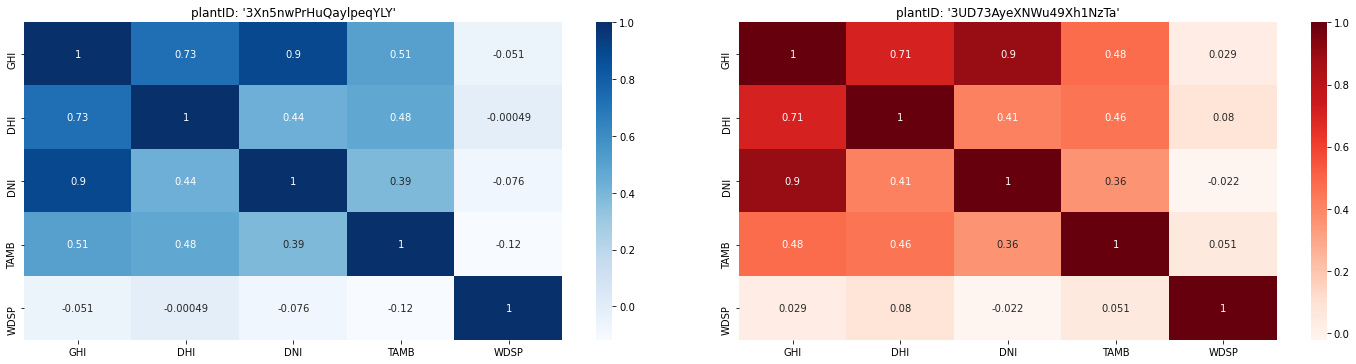

In [6]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
fig.tight_layout()

sns.heatmap(df_plant_0.corr(),annot=True,cmap='Blues',ax=ax[0])
ax[0].set_title("plantID: '3Xn5nwPrHuQaylpeqYLY'")

sns.heatmap(df_plant_1.corr(),annot=True,cmap='Reds',ax=ax[1])
ax[1].set_title("plantID: '3UD73AyeXNWu49Xh1NzTa'");

In [7]:
# -- FUNCTIONS -- #

# GET HIGHEST ARRAY LENGTH IN CONFIG
def get_highest_length(config):
    max_length = 0

    for key, value in config.items():
        max_length = max(max_length, len(value))

    return max_length

# ADJUST CONFIG FOR DISPLAY IN DATAFRAME
def adjust_config(config, max_length):
    for key, value in config.items():
        if len(value) < max_length:
            config[key].extend([''] * (max_length - len(value)))

    return

# LIST FILES FOUND IN JSON DIRECTORY
def list_json_files():
    return [file.name for file in Path('json').iterdir() if file.is_file() and file.suffix == '.json']

# SET PANDAS SETTINGS
# NOTE: this function might not work in Jupyter
def set_pandas_options():
    pd.set_option('display.max_rows', None) # set row display limit to unlimited
    pd.set_option('display.max_columns', None) # set col display limit to unlimited
    pd.set_option('display.width', None) # auto detect width of the display
    pd.set_option('display.colheader_justify', 'center') # center column headers

    return

# -- MAIN -- #

set_pandas_options()
json_files = list_json_files()
json_data = {}

# CONFIG INFO
info = {
    'plantName' : [],
    'thirdPartyPlantId' : [],
    'latitude' : [],
    'longitude' : [],
    'plant' : [],
    'config' : [],
    'invName' : [],
    'thirdPartyDeviceId' : [],
    'MPPTShapes' : [],
    'modNames' : [],
    'tilt' : [],
    'azimuth' : [],
    'mountType' : [],
    'device' : []
}

# iterate through each file
for json_file in json_files:
    # read json file and convert to dictionary
    with open(f'json/{json_file}', 'r') as file:
        json_data = json.load(file)

    # FORMAT CONFIG
    info['plantName'].append(json_data['plantName'])
    info['thirdPartyPlantId'].append(json_data['thirdPartyPlantId'])
    info['latitude'].append(json_data['latitude'])
    info['longitude'].append(json_data['longitude'])
    info['plant'].append(json_data['plant'])

    for key, value in json_data['config'].items():
        info['config'].append(key)
        info['invName'].append(value['invName'])
        info['thirdPartyDeviceId'].append(value['thirdPartyDeviceId'])
        info['device'].append(value['device'])
        info['MPPTShapes'].extend(map(str, value['MPPTShapes']))
        info['modNames'].extend(value['modNames'])
        info['tilt'].extend([str(value['tilt'])])
        info['azimuth'].extend([str(value['azimuth'])])
        info['mountType'].extend(value['mountType'])

        # get highest length
        adjust_config(info, get_highest_length(info))

df_info = pd.DataFrame(info)
df_info

,plantName,thirdPartyPlantId,latitude,longitude,plant,config,invName,thirdPartyDeviceId,MPPTShapes,modNames,tilt,azimuth,mountType,device
0,Another Plant,074b70e6-e4b9-4f33-8b7b-6314a92dc6ab,-22.844637,-47.053179,plant/3Xn5nwPrHuQaylpeqYLY,1,Fronius_Symo_20_0_3_M,942e7ba9-00f3-4695-8cc4-212cb398c711,"[17, 17]",Canadian_CS3U-355MS,"[8, 8]","[10, 10]",insulated,device/gdBuQRjnnd0MlBkFM5Bq
1,,,,,,,,,"[17, 17]",Canadian_CS3U-355MS,,,insulated,
2,,,,,,2,Fronius_Symo_20_0_3_M,2cb357b6-acb5-4302-89c0-a686bc199bd5,"[17, 17]",Canadian_CS3U-355MS,"[8, 8]","[10, 270]",insulated,device/TUNbvqK39a7iNY2b31vN
3,,,,,,,,,"[19, 19]",Canadian_CS3U-355MS,,,insulated,
4,19#1280 - Artbel,074b70e6-e4b9-4f33-8b7b-6314a92dc6ab,-22.844637,-47.053179,plant/3Xn5nwPrHuQaylpeqYLY,1,Fronius_Symo_20_0_3_M,942e7ba9-00f3-4695-8cc4-212cb398c711,"[17, 17]",Canadian_CS3U-355MS,"[8, 8]","[10, 10]",insulated,device/gdBuQRjnnd0MlBkFM5Bq
5,,,,,,,,,"[17, 17]",Canadian_CS3U-355MS,,,insulated,
6,,,,,,2,Fronius_Symo_20_0_3_M,2cb357b6-acb5-4302-89c0-a686bc199bd5,"[17, 17]",Canadian_CS3U-355MS,"[8, 8]","[10, 270]",insulated,device/TUNbvqK39a7iNY2b31vN
7,,,,,,,,,"[19, 19]",Canadian_CS3U-355MS,,,insulated,


In [10]:
def effective_conditions(weather,plant_conf,device_id):
   
    #import weather.csv file
    df_weather = pd.read_csv(weather)
    
    #extract True plantId and inverterId
    plant_conf['plantId'] = plant_conf['plant'].str.split('/',expand=True)[1]
    plant_conf['inverterId'] = plant_conf['device'].str.split('/',expand=True)[1]
    
    #replacing '' with nan values and used forward fill method
    plant_conf = plant_conf.replace('',np.nan)
    plant_conf = plant_conf.fillna(method='ffill')

    
    #stripping '[]' character, splitting by ',' and converting to int type values in MPPTShapes, tilt, & azimuth columns
    plant_conf['MPPTShapes_0'] = plant_conf['MPPTShapes'].str.strip('[]').str.split(',',expand=True)[0].astype('int32')
    plant_conf['MPPTShapes_1'] = plant_conf['MPPTShapes'].str.strip('[]').str.split(',',expand=True)[1].astype('int32')
    plant_conf['tilt_0'] = plant_conf['tilt'].str.strip('[]').str.split(',',expand=True)[0].astype('int32')
    plant_conf['tilt_1'] = plant_conf['tilt'].str.strip('[]').str.split(',',expand=True)[1].astype('int32')
    plant_conf['azimuth_0'] = plant_conf['azimuth'].str.strip('[]').str.split(',',expand=True)[0].astype('int32')
    plant_conf['azimuth_1'] = plant_conf['azimuth'].str.strip('[]').str.split(',',expand=True)[1].astype('int32')
    
    #dropping MPPTShapes, tilt, & azimuth columns
    plant_conf = plant_conf.drop(columns=['MPPTShapes', 'tilt', 'azimuth'])

    #merging df_weather and plant_conf by plantId
    df_all = df_weather.merge(plant_conf,how='left',on='plantId')
    df_all = df_all.dropna().reset_index(drop=True)
    
    #converting 'Timestamp' column to datetime value
    df_all['Timestamp'] = pd.to_datetime(df_all['Timestamp'])
    
    #extracting latitude and longitude data for solarposition parameter
    lat = df_all[['latitude','longitude']].value_counts().index[0][0]
    lon = df_all[['latitude','longitude']].value_counts().index[0][1]
    solpos = solarposition.get_solarposition(df_all.Timestamp, lat, lon)
    
    #merging solar position with df_all by 'Timestamp'
    for col in solpos.columns:
        df_all[col] = solpos[col].values
    
    #data as merge dataframe of df_all and solpos
    data = df_all
    
    #getting total irridiance
    irrad = irradiance.get_total_irradiance(surface_tilt=data['tilt_1'], surface_azimuth=data['azimuth_1'], 
                                            solar_zenith=data['apparent_zenith'], solar_azimuth=data['azimuth'], 
                                            dni=data.DNI, ghi=data.GHI,dhi=data.DHI)
    
    #adding POA column in data dataframe from irrad poa_global column
    data['POA'] = irrad['poa_global']
    
    #getting cel temperature and adding its column to data dataframe
    temp_model_params = temperature.TEMPERATURE_MODEL_PARAMETERS['pvsyst']['insulated']
    data['T_cell'] = temperature.pvsyst_cell(data.POA, data.TAMB, **temp_model_params)
    
    #getting the effective irridiance using Canadian_Solar_CS5P_220M___2009_ PV module
    airmass_relative = atmosphere.get_relative_airmass(data['zenith'], model='kastenyoung1989')
    airmass_absolute = atmosphere.get_absolute_airmass(airmass_relative, pressure=101325.0)
    aoi = irradiance.aoi(data['tilt_1'], data['azimuth_1'], data['apparent_zenith'], data['azimuth'])
    module = pvsystem.retrieve_sam(name='SandiaMod', path=None)
    inverter = module['Canadian_Solar_CS5P_220M___2009_']
    effective_irradiance = pvsystem.sapm_effective_irradiance(irrad['poa_direct'],irrad['poa_diffuse'],airmass_absolute,aoi,inverter)

    
    #adding 'G_eff' in data dataframe
    data['G_eff'] = effective_irradiance
    
    #slicing data dataframe by inverterId/plantId
    data = data[data['inverterId']==device_id]

    #getting efficient POA in data dataframe
    data_final = data[data['G_eff']==data['G_eff'].max()].reset_index(drop=True)
    
    #selecting important columns
    columns =['Timestamp', 'GHI', 'DHI', 'DNI', 'TAMB', 'WDSP', 'plantId','deviceId' ,'plantName', 'inverterId', 'config', 
              'MPPTShapes_1', 'tilt_1', 'azimuth_1','apparent_zenith','zenith','apparent_elevation','azimuth',
              'equation_of_time','POA', 'G_eff', 'T_cell']
    
    #reset index and drop duplicates
    data_final = data_final[columns].drop_duplicates().reset_index(drop=True)
    
    #save file to csv format
    file = 'data_'+device_id+'.csv'
    data_final.to_csv(file, index=False)

    return data_final

In [13]:
weather = 'weather_data.csv'
plant_conf = df_info
#device_id/plant_id = ['gdBuQRjnnd0MlBkFM5Bq', 'TUNbvqK39a7iNY2b31vN']
#mppt = 1


effective_conditions(weather,plant_conf,'gdBuQRjnnd0MlBkFM5Bq').head()

,Timestamp,GHI,DHI,DNI,TAMB,WDSP,plantId,deviceId,plantName,inverterId,config,MPPTShapes_1,tilt_1,azimuth_1,apparent_zenith,zenith,apparent_elevation,azimuth,equation_of_time,POA,G_eff,T_cell
0,2020-01-01 00:00:00+00:00,0.0,0.0,0.0,26.312500,1.279297,3Xn5nwPrHuQaylpeqYLY,virtual-weather-station,Another Plant,gdBuQRjnnd0MlBkFM5Bq,1,17.0,8.0,10.0,114.662906,114.662906,-24.662906,228.617464,-3.081724,0.0,0.0,26.312500
1,2020-01-01 00:00:00+00:00,0.0,0.0,0.0,26.312500,1.279297,3Xn5nwPrHuQaylpeqYLY,virtual-weather-station,19#1280 - Artbel,gdBuQRjnnd0MlBkFM5Bq,1,17.0,8.0,10.0,114.662906,114.662906,-24.662906,228.617464,-3.081724,0.0,0.0,26.312500
2,2020-01-01 01:00:00+00:00,0.0,0.0,0.0,25.875000,0.950195,3Xn5nwPrHuQaylpeqYLY,virtual-weather-station,Another Plant,gdBuQRjnnd0MlBkFM5Bq,1,17.0,8.0,10.0,124.091184,124.091184,-34.091184,217.037526,-3.101587,0.0,0.0,25.875000
3,2020-01-01 01:00:00+00:00,0.0,0.0,0.0,25.875000,0.950195,3Xn5nwPrHuQaylpeqYLY,virtual-weather-station,19#1280 - Artbel,gdBuQRjnnd0MlBkFM5Bq,1,17.0,8.0,10.0,124.091184,124.091184,-34.091184,217.037526,-3.101587,0.0,0.0,25.875000
4,2020-01-01 02:00:00+00:00,0.0,0.0,0.0,24.140625,1.250977,3Xn5nwPrHuQaylpeqYLY,virtual-weather-station,Another Plant,gdBuQRjnnd0MlBkFM5Bq,1,17.0,8.0,10.0,130.936780,130.936780,-40.936780,201.902853,-3.121441,0.0,0.0,24.140625
